# EDA de metricas de 2023

## Importando Librerias

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Trayendo el dataset

In [12]:
df_2023=pd.read_csv('./industry_metrics2023-11-23.csv')

## Empezando el EDA

In [13]:
df_2023.head()

,Unnamed: 0,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,month_year1,trips_per_month,month_date,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
0,1,FHV - Black Car,19294,NaN,7556,6723,3088,13.8,4.8,13.3,...,Sep 2023,578820,2023-09-28,NaN,39,135058,2023,NaN,NaN,NaN
1,2,FHV - Black Car,21358,NaN,7507,6682,3143,14.6,5.2,14.0,...,Aug 2023,662098,2023-08-28,NaN,35,149506,2023,NaN,NaN,NaN
2,3,FHV - Black Car,17464,NaN,7352,6568,2842,13.4,4.7,12.9,...,Jul 2023,541384,2023-07-28,NaN,30,122248,2023,NaN,NaN,NaN
3,4,FHV - Black Car,17742,NaN,7183,6449,2899,13.5,4.7,13.0,...,Jun 2023,532260,2023-06-28,NaN,26,124194,2023,NaN,NaN,NaN
4,5,FHV - Black Car,21770,NaN,7508,6844,3318,15.0,5.0,14.6,...,May 2023,674870,2023-05-28,NaN,21,152390,2023,NaN,NaN,NaN


In [14]:
#eliminamos la primer columna vacia

df_2023 = df_2023.iloc[:, 1:]  # Selecciona todas las filas y todas las columnas a partir de la segunda


In [16]:
df_2023.isnull().sum()

license_class                               0
trips_per_day                               0
farebox_per_day                           420
unique_drivers                              0
unique_vehicles                             0
vehicles_per_day                            0
avg_days_vehicles_on_road                   0
avg_hours_per_day_per_vehicle               0
avg_days_drivers_on_road                    0
avg_hours_per_day_per_driver                0
avg_minutes_per_trip                        0
percent_of_trips_paid_with_credit_card    420
trips_per_day_shared                      615
month_year                                  0
month_year1                                 0
trips_per_month                             0
month_date                                  0
farebox_per_month                         420
week                                        0
trips_per_week                              0
year                                        0
farebox_per_week                  

In [18]:
# quitamos las columnas que son redundantes o que tienen gran cantidad de valores faltantes

df_2023=df_2023.drop(['shared_trips_per_day_percent','total_trips_per_day','month_year1','month_date','trips_per_day_shared'],axis=1)

In [19]:
df_2023.head()

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,avg_minutes_per_trip,percent_of_trips_paid_with_credit_card,month_year,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week
0,FHV - Black Car,19294,NaN,7556,6723,3088,13.8,4.8,13.3,4.5,28.0,NaN,2023-09,578820,NaN,39,135058,2023,NaN
1,FHV - Black Car,21358,NaN,7507,6682,3143,14.6,5.2,14.0,4.9,27.0,NaN,2023-08,662098,NaN,35,149506,2023,NaN
2,FHV - Black Car,17464,NaN,7352,6568,2842,13.4,4.7,12.9,4.4,25.0,NaN,2023-07,541384,NaN,30,122248,2023,NaN
3,FHV - Black Car,17742,NaN,7183,6449,2899,13.5,4.7,13.0,4.4,26.0,NaN,2023-06,532260,NaN,26,124194,2023,NaN
4,FHV - Black Car,21770,NaN,7508,6844,3318,15.0,5.0,14.6,4.7,29.0,NaN,2023-05,674870,NaN,21,152390,2023,NaN


In [21]:
df_2023.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           707 non-null    object 
 1   trips_per_day                           707 non-null    int64  
 2   farebox_per_day                         287 non-null    float64
 3   unique_drivers                          707 non-null    int64  
 4   unique_vehicles                         707 non-null    int64  
 5   vehicles_per_day                        707 non-null    int64  
 6   avg_days_vehicles_on_road               707 non-null    float64
 7   avg_hours_per_day_per_vehicle           707 non-null    float64
 8   avg_days_drivers_on_road                707 non-null    float64
 9   avg_hours_per_day_per_driver            707 non-null    float64
 10  avg_minutes_per_trip                    707 non-null    float6

In [20]:
df_2023.describe()

,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,avg_minutes_per_trip,percent_of_trips_paid_with_credit_card,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week
count,707.000000,2.870000e+02,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,287.000000,7.070000e+02,2.870000e+02,707.000000,7.070000e+02,707.000000,2.870000e+02
mean,154632.448373,2.592871e+06,17810.339463,14567.565771,10131.123055,19.937341,6.351627,18.233522,5.278501,19.740453,0.600906,4.703679e+06,7.888379e+07,27.437058,1.082427e+06,2018.176803,1.815009e+07
std,207388.168912,2.392318e+06,21967.472946,20878.529031,14109.982919,5.462462,3.688318,3.612199,1.941836,17.970956,0.130919,6.307806e+06,7.280823e+07,14.893006,1.451717e+06,3.169637,1.674623e+07
min,148.000000,4.028000e+03,129.000000,114.000000,33.000000,6.700000,1.900000,6.800000,1.800000,0.000000,0.300000,4.440000e+03,1.248680e+05,4.000000,1.036000e+03,2010.000000,2.819600e+04
25%,12155.000000,3.529700e+05,3782.500000,3555.500000,2017.000000,15.400000,3.600000,15.400000,3.600000,12.600000,0.495000,3.681150e+05,1.047914e+07,13.000000,8.508500e+04,2016.000000,2.470790e+06
50%,35889.000000,1.903868e+06,7279.000000,6734.000000,3988.000000,19.800000,5.500000,19.400000,5.300000,15.900000,0.620000,1.067950e+06,5.901991e+07,26.000000,2.512230e+05,2018.000000,1.332708e+07
75%,300721.500000,5.054254e+06,28297.500000,13322.500000,12162.500000,23.800000,6.800000,21.300000,6.600000,20.000000,0.700000,9.056759e+06,1.542980e+08,39.000000,2.105050e+06,2021.000000,3.537978e+07
max,769729.000000,6.744373e+06,87779.000000,86540.000000,59902.000000,30.100000,15.300000,23.200000,8.500000,75.000000,0.810000,2.386160e+07,2.090756e+08,52.000000,5.388103e+06,2023.000000,4.721061e+07


El conjunto de datos destaca un promedio de 154,632 viajes por día, con una recaudación diaria promedio de aproximadamente $2.59 millones. La cantidad de conductores y vehículos muestra una variabilidad considerable, al igual que la duración promedio de los viajes, que ronda los 19.74 minutos. Alrededor del 60.09% de los viajes se pagan con tarjeta de crédito, aunque esta información se encuentra limitada a 287 registros. Estos datos ofrecen una visión instantánea de la actividad diaria y las tendencias en la industria.

## Graficos y relaciones

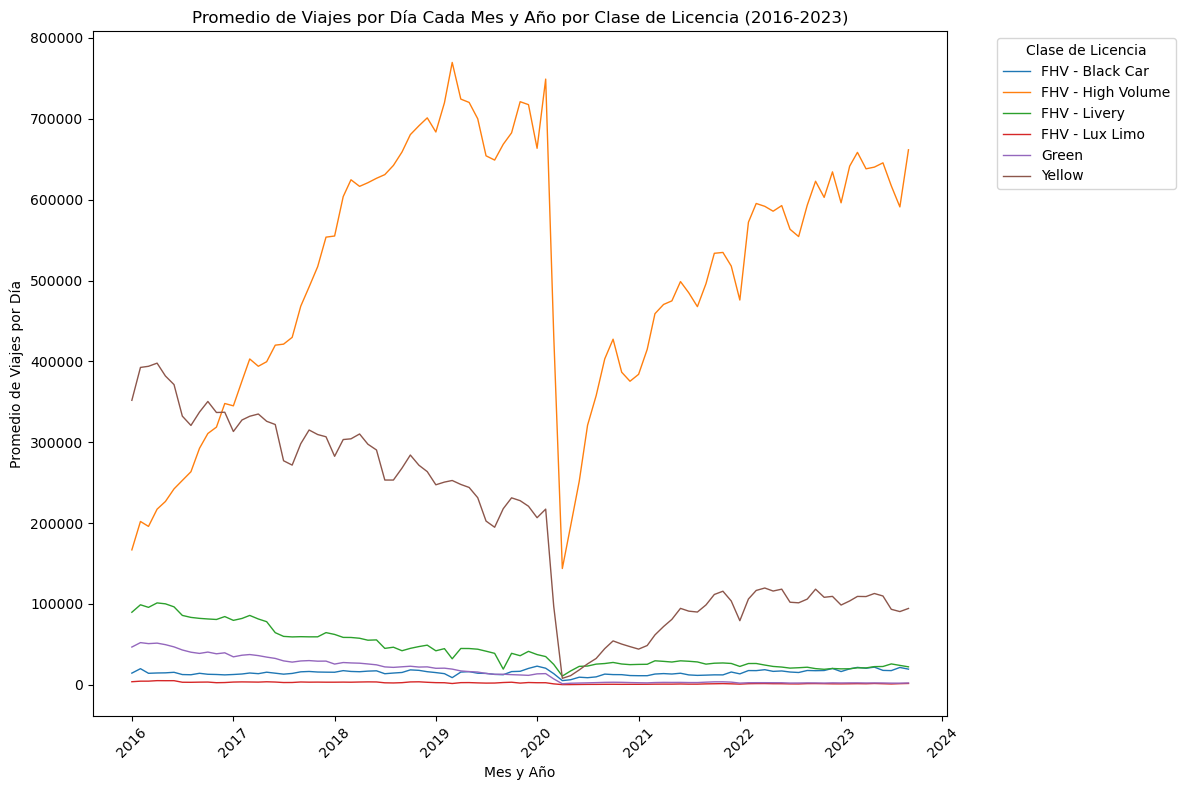

In [34]:

# Filtrar los datos desde 2016 hasta 2023
df_filtered = df_2023[df_2023['month_year'].dt.year.between(2016, 2023)]

# Calcular el promedio de viajes por día para cada mes y clase de licencia
avg_trips_per_day = df_filtered.groupby(['month_year', 'license_class'])['trips_per_day'].mean().reset_index().pivot(index='month_year', columns='license_class', values='trips_per_day')

# Crear el gráfico de líneas sin puntos
plt.figure(figsize=(12, 8))

# Iterar a través de las clases de licencia para trazar cada una en el gráfico sin puntos
for column in avg_trips_per_day.columns:
    plt.plot(avg_trips_per_day.index, avg_trips_per_day[column], label=column, linestyle='-', linewidth=1)

plt.xlabel('Mes y Año')
plt.ylabel('Promedio de Viajes por Día')
plt.title('Promedio de Viajes por Día Cada Mes y Año por Clase de Licencia (2016-2023)')
plt.legend(title='Clase de Licencia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vemos que desde inicios de 2016 a habido una caida en el uso de los taxis amarillos y verdes, mercado que se llevaron las aplicaciones del estilo de uber, tambien se puede ver que en 2020 calleron los usos de todos los tipos de movilidad. De esto se puede ver que las aplicaciones se recuperaron relativamente rapido, pero los otros medios de transporte no pudieron recuperarse del todo

<Figure size 1000x600 with 0 Axes>

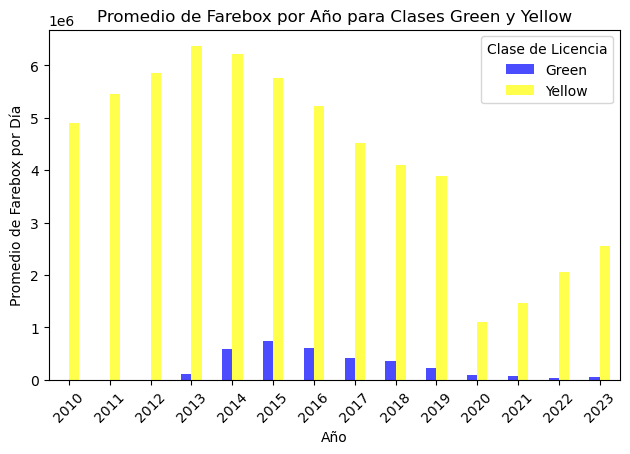

In [36]:
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las clases 'Green' y 'Yellow'
filtered_data = df_2023[df_2023['license_class'].isin(['Green', 'Yellow'])]

# Calcular el promedio de Farebox por año y clase de licencia
avg_farebox_per_year = filtered_data.groupby([df_2023['month_year'].dt.year, 'license_class'])['farebox_per_day'].mean().unstack()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Generar el gráfico de barras para el promedio de Farebox por año y clase de licencia
avg_farebox_per_year.plot(kind='bar', color=['blue', 'yellow'], alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Promedio de Farebox por Día')
plt.title('Promedio de Farebox por Año para Clases Green y Yellow')
plt.legend(title='Clase de Licencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vemos que los taxis amarillos son los que tienen las mayores ganancias y que tuvieron una gran caida en el año 2020 de la que no se han podido recuperar. La caida en las ganancias de los años 2013 a 2019 puede estar relacionada con la implementación de las aplicaciones de pasajeros.

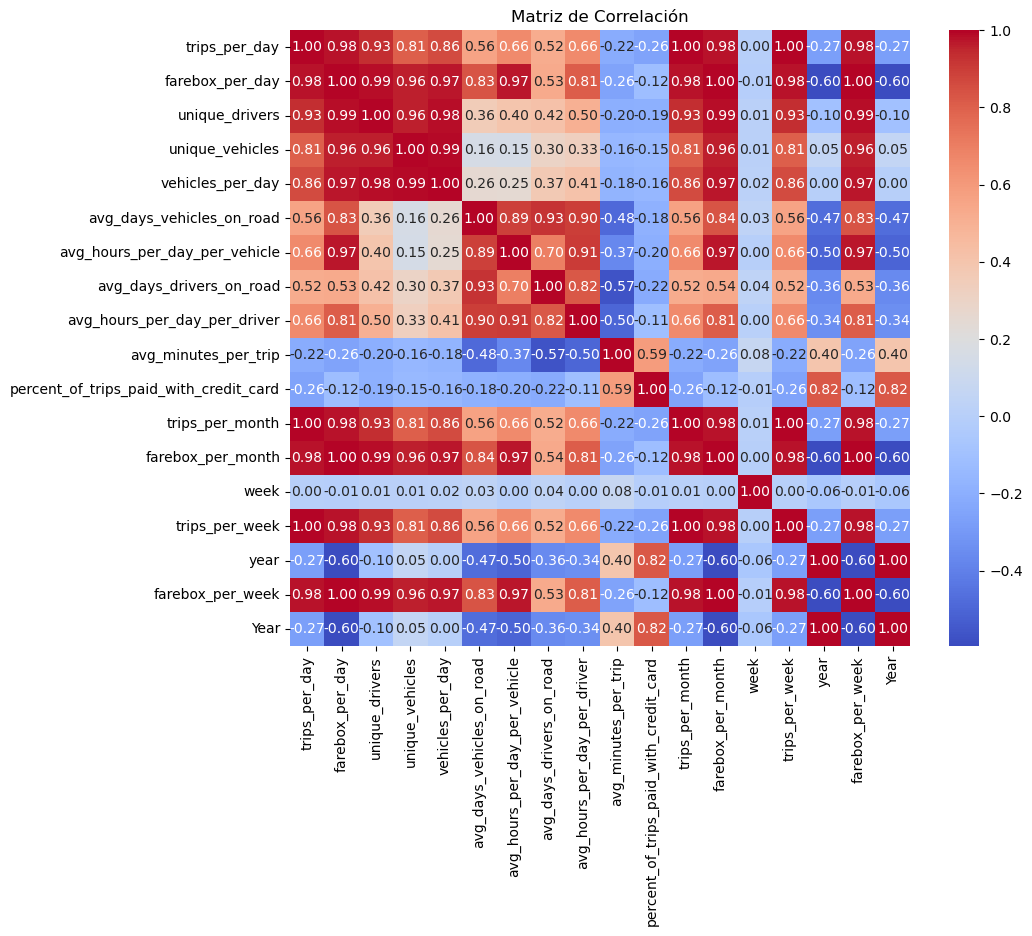

In [37]:


# Seleccionar las columnas numéricas para la matriz de correlación
numeric_cols = df_2023.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear la matriz de correlación
corr_matrix = df_2023[numeric_cols].corr()

# Plotear la matriz de correlación con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Recaudación (Farebox) y Duración del Viaje (avg_minutes_per_trip): Existe una correlación positiva entre la recaudación y la duración del viaje. Los viajes más largos tienden a generar una mayor tarifa, lo que sugiere una relación directa entre la duración del viaje y el monto recaudado.

Recaudación y Número de Viajes (trips_per_day): Existe una correlación positiva entre la recaudación y el número de viajes. Un mayor número de viajes se relaciona con una mayor recaudación total.

Número de Conductores (unique_drivers) y Número de Vehículos (unique_vehicles): Se observa una correlación positiva entre el número de conductores y el número de vehículos. Esto sugiere que generalmente se necesita un vehículo por cada conductor activo.

Número de Viajes y Duración Promedio del Vehículo en Carretera (avg_days_vehicles_on_road): Se registra una correlación positiva entre el número de viajes y la duración promedio del vehículo en la carretera. Esto indica que períodos más largos en los que los vehículos están activos en la carretera pueden estar asociados con un mayor número de viajes.


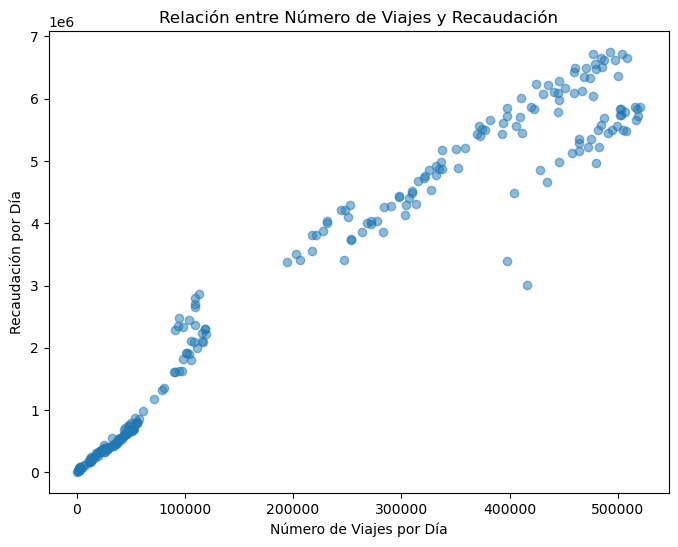

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df_2023['trips_per_day'], df_2023['farebox_per_day'], alpha=0.5)
plt.xlabel('Número de Viajes por Día')
plt.ylabel('Recaudación por Día')
plt.title('Relación entre Número de Viajes y Recaudación')
plt.show()


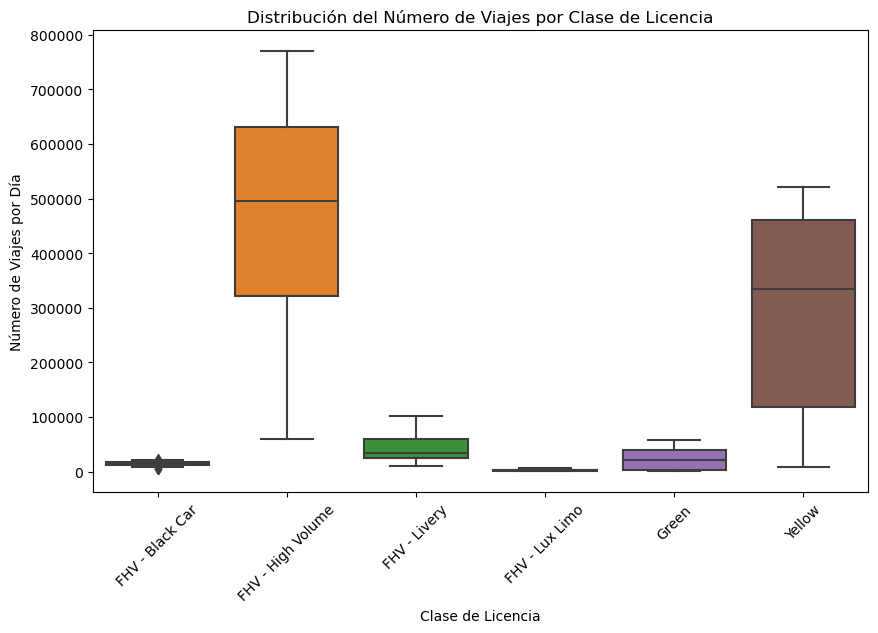

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2023, x='license_class', y='trips_per_day')
plt.xlabel('Clase de Licencia')
plt.ylabel('Número de Viajes por Día')
plt.title('Distribución del Número de Viajes por Clase de Licencia')
plt.xticks(rotation=45)
plt.show()

